In [2]:
import os
import tempfile
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

In [4]:
ratings = tfds.load("movielens/1m-ratings", split="train")
movies = tfds.load("movielens/1m-movies", split="train")

In [5]:
for record in ratings.take(5):
  print(record)

{'bucketized_user_age': <tf.Tensor: shape=(), dtype=float32, numpy=35.0>, 'movie_genres': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 7])>, 'movie_id': <tf.Tensor: shape=(), dtype=string, numpy=b'3107'>, 'movie_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Backdraft (1991)'>, 'timestamp': <tf.Tensor: shape=(), dtype=int64, numpy=977432193>, 'user_gender': <tf.Tensor: shape=(), dtype=bool, numpy=True>, 'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'130'>, 'user_occupation_label': <tf.Tensor: shape=(), dtype=int64, numpy=18>, 'user_occupation_text': <tf.Tensor: shape=(), dtype=string, numpy=b'technician/engineer'>, 'user_rating': <tf.Tensor: shape=(), dtype=float32, numpy=5.0>, 'user_zip_code': <tf.Tensor: shape=(), dtype=string, numpy=b'50021'>}
{'bucketized_user_age': <tf.Tensor: shape=(), dtype=float32, numpy=25.0>, 'movie_genres': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>, 'movie_id': <tf.Tensor: shape=(), dtype=string, numpy=b'2114'>, 'movie_title

In [6]:
movies_df = tfds.as_dataframe(movies)
movies_df.head(10)

movie_genres movie_id                                        movie_title
0       [5, 7]  b'1729'                             b'Jackie Brown (1997)'
1          [7]  b'1486'                          b'Quiet Room, The (1996)'
2          [4]  b'3086'  b'March of the Wooden Soldiers (a.k.a. Laurel ...
3          [0]  b'2965'                          b'Omega Code, The (1999)'
4         [10]  b'2853'  b'Communion (a.k.a. Alice, Sweet Alice/Holy Te...
5          [7]   b'503'                             b'New Age, The (1994)'
6          [7]   b'848'                      b'Spitfire Grill, The (1996)'
7          [4]  b'3544'                         b'Shakes the Clown (1991)'
8          [7]  b'1694'                             b'Apostle, The (1997)'
9      [4, 14]   b'550'                                b'Threesome (1994)'

In [7]:
ratings_df = tfds.as_dataframe(ratings)
ratings_df.head()

bucketized_user_age movie_genres movie_id                      movie_title  \
0                 35.0       [0, 7]  b'3107'              b'Backdraft (1991)'   
1                 25.0          [7]  b'2114'         b'Outsiders, The (1983)'   
2                 18.0      [4, 15]   b'256'                 b'Junior (1994)'   
3                 18.0      [0, 10]  b'1389'               b'Jaws 3-D (1983)'   
4                 18.0          [0]  b'3635'  b'Spy Who Loved Me, The (1977)'   

    timestamp  user_gender  user_id  user_occupation_label  \
0   977432193         True   b'130'                     18   
1   965932967        False  b'3829'                      0   
2  1012103552        False  b'1265'                     21   
3   972004605         True  b'2896'                     14   
4   961180111         True  b'5264'                     17   

      user_occupation_text  user_rating user_zip_code  
0   b'technician/engineer'          5.0      b'50021'  
1     b'academic/educator'          4.0      b'22307'  
2                b'writer'          1.0      b'49321'  
3       b'sales/marketing'          5.0      b'60073'  
4  b'college/grad student'          4.0      b'15217'

In [8]:
print(ratings_df.shape,movies_df.shape)

(1000209, 11) (3883, 3)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Merge the ratings and movies dataframe
df = pd.merge(ratings_df, movies_df, on='movie_id')



In [11]:
df.head()

bucketized_user_age movie_genres_x movie_id        movie_title_x  \
0                 35.0         [0, 7]  b'3107'  b'Backdraft (1991)'   
1                 18.0         [0, 7]  b'3107'  b'Backdraft (1991)'   
2                 35.0         [0, 7]  b'3107'  b'Backdraft (1991)'   
3                 50.0         [0, 7]  b'3107'  b'Backdraft (1991)'   
4                 18.0         [0, 7]  b'3107'  b'Backdraft (1991)'   

   timestamp  user_gender  user_id  user_occupation_label  \
0  977432193         True   b'130'                     18   
1  959871063         True  b'5482'                      6   
2  974769912         True  b'1980'                      6   
3  963245565         True  b'4746'                      0   
4  960660787         True  b'5350'                      3   

      user_occupation_text  user_rating  user_zip_code movie_genres_y  \
0   b'technician/engineer'          5.0       b'50021'         [0, 7]   
1  b'executive/managerial'          4.0       b'10014'         [0, 7]   
2  b'executive/managerial'          3.0       b'06460'         [0, 7]   
3     b'academic/educator'          3.0  b'19087-3622'         [0, 7]   
4      b'customer service'          2.0       b'55344'         [0, 7]   

         movie_title_y  
0  b'Backdraft (1991)'  
1  b'Backdraft (1991)'  
2  b'Backdraft (1991)'  
3  b'Backdraft (1991)'  
4  b'Backdraft (1991)'

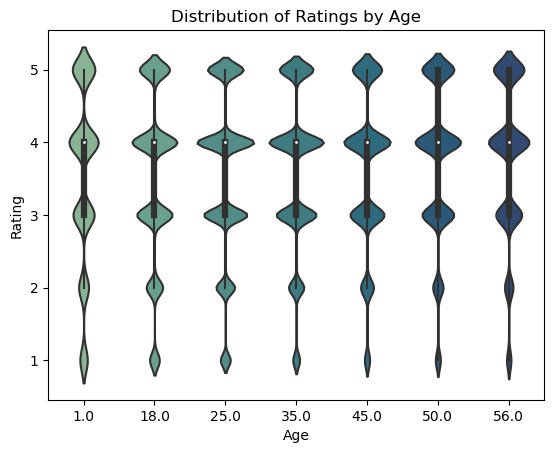

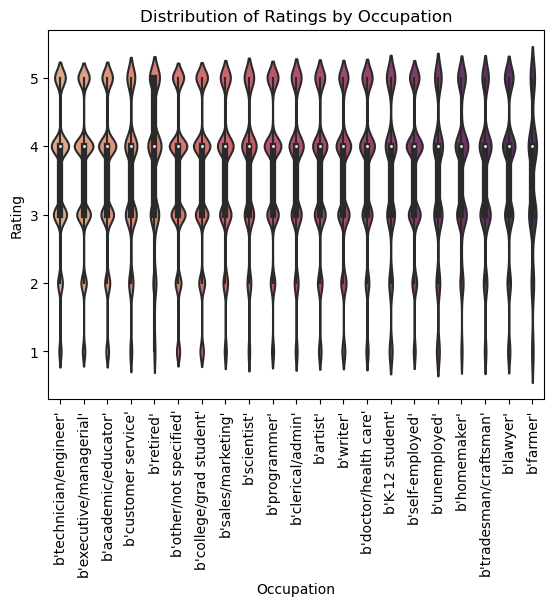

In [20]:
# Check the distribution of ratings by gender
sns.violinplot(x='user_gender', y='user_rating', data=df,palette='rocket')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Gender')
plt.show()

# Check the distribution of ratings by age
sns.violinplot(x='bucketized_user_age', y='user_rating', data=df,palette='crest')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Age')
plt.show()

# Check the distribution of ratings by occupation
sns.violinplot(x='user_occupation_text', y='user_rating', data=df,palette='flare')
plt.xlabel('Occupation')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Occupation')
plt.show()

df['movie_genres_y'] = df['movie_genres_y'].astype(str)
# Check the distribution of genres by gender
df['movie_genres_y'] = df['movie_genres_y'].str.split('|')
df_genres = df.explode('movie_genres_y')
sns.countplot(x='movie_genres_y', hue='user_gender', data=df_genres)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres by Gender')
plt.show()


In [16]:
import scipy.stats as stats

# Test for bias in ratings by gender
male_ratings = df[df['user_gender'] == '0']['user_rating']
female_ratings = df[df['user_gender'] == '1']['user_rating']
t_stat, p_value = stats.ttest_ind(male_ratings, female_ratings)
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in ratings by gender.")
else:
    print("There is no significant difference in ratings by gender.")

# Test for bias in ratings by age
age_groups = df['bucketized_user_age'].unique()
for age_group in age_groups:
    age_ratings = df[df['bucketized_user_age'] == age_group]['user_rating']
    t_stat, p_value = stats.ttest_ind(age_ratings, df['user_rating'])
    print
    print("Age group:", age_group)
    print("t-statistic:", t_stat)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("There is a significant difference in ratings for age group:", age_group)
    else:
        print("There is no significant difference in ratings for age group:", age_group)
    print("\n")

# Test for bias in ratings by occupation
occ_groups = df['user_occupation_label'].unique()
for occ_group in occ_groups:
    occ_ratings = df[df['user_occupation_label'] == occ_group]['user_rating']
    t_stat, p_value = stats.ttest_ind(occ_ratings, df['user_rating'])
    print("Occupation group:", occ_group)
    print("t-statistic:", t_stat)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("There is a significant difference in ratings for occupation group:", occ_group)
    else:
        print("There is no significant difference in ratings for occupation group:", occ_group)
    print("\n")


t-statistic: nan
p-value: nan
There is no significant difference in ratings by gender.
Age group: 35.0
t-statistic: 13.42352104786976
p-value: 4.4330979723753956e-41
There is a significant difference in ratings for age group: 35.0


Age group: 18.0
t-statistic: -25.904426272217442
p-value: 6.53126326966318e-148
There is a significant difference in ratings for age group: 18.0


Age group: 50.0
t-statistic: 31.043191688777497
p-value: 1.7508971272280606e-211
There is a significant difference in ratings for age group: 50.0


Age group: 25.0
t-statistic: -17.270112420699114
p-value: 8.026540440885359e-67
There is a significant difference in ratings for age group: 25.0


Age group: 56.0
t-statistic: 32.06680615917591
p-value: 1.6516616925851105e-225
There is a significant difference in ratings for age group: 56.0


Age group: 45.0
t-statistic: 14.099554857575592
p-value: 3.8570734078669865e-45
There is a significant difference in ratings for age group: 45.0


Age group: 1.0
t-statistic: -4.

These results show that there is a significant difference in ratings for certain demographic groups, such as age group 35, 18, 50, 25, 56, 45 and certain occupation groups like 'technician/engineer, executive/managerial, 3, 13, 11, 17, sales/marketing, 15, 12, 2, writer, 4, 16, 20, 8, 19, 9 and 7. However, there is no significant difference in ratings for gender and occupation group academic/educator, and artist. It is worth noting that these results are based on the specific data used in the study and may not generalize to other populations or datasets.